Importa as classes necessárias




In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Lê o arquivo e apresenta os dados

In [ ]:
dados = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mineração de Dados/Aula6/insurance.csv')
dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Verifica se existe algum valor nulo no conjunto.

In [ ]:
dados.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Como existem três atributos qualitativos, eles devem ser convertidas em valores quantitativos para serem incorporados ao modelo. Embora todos eles sejam nominais, não será usado o método **get_dummies** do Pandas, que é o mais indicado neste caso para gerar uma representação binária. Neste exemplo, será usado o **LabelEnconder** para gerar um código numérico para cada valor, de forma a não gerar colunas extras visando simplificar os cálculos solicitados posteriormente.

Um novo dataset será gerado para não sobrepor os dados originais que serão usados posteriormente.

In [ ]:
dados2 = dados.copy()

le = LabelEncoder()
dados2['smoker']=le.fit_transform(dados2['smoker'])
dados2['region']=le.fit_transform(dados2['region'])
dados2['sex']=le.fit_transform(dados2['sex'])
dados2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Para criar um modelo considerando todas os atributos disponíveis como variáveis independentes (exceto o atributo **charges** que é o que se deseja estimar) deve-se:
1. Armazenar os dados de todas as colunas, exceto da coluna charges, na variável X, que é uma lista de listas.
2. Armazenar os dados da coluna charges na variável y, que é uma lista de valores numéricos.
3. Usar a função train_test_split para dividir os dados em 67% para o conjunto de treinamento e 33% para o conjunto de teste.

A lista X é divida em X_train e X_test, e a lista y em y_train e y_test. O parâmetro shuffle indica que a divisão será aleatória e não sequencial e o parâmetro random_state indica o valor inicial da aleatorização (semente) para poder repetir os mesmos valores em diferentes execuções.

In [ ]:
X = dados2.drop(['charges'] ,axis='columns')
y = dados2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print('X - Treinamento: ')
print(X_train)
print('Y - Treinamento: ')
print(y_train)
print('X - Teste: ')
print(X_test)
print('Y -Teste: ')
print(y_test)


X - Treinamento: 
      age  sex     bmi  children  smoker  region
1046   43    0  25.080         0       0       0
682    39    1  35.300         2       1       3
1037   45    0  30.495         1       1       1
490    19    0  32.900         0       0       3
39     60    1  39.900         0       1       3
...   ...  ...     ...       ...     ...     ...
1095   18    0  31.350         4       0       0
1130   39    0  23.870         5       0       2
1294   58    1  25.175         0       0       0
860    37    0  47.600         2       1       3
1126   55    1  29.900         0       0       3

[896 rows x 6 columns]
Y - Treinamento: 
1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 896, dtype: float64
X - Teste: 
      age  sex     bmi  children  smoker  region
764    45    0  25.175      

1. Cria o modelo;
2. Treina o modelo, a partir dos dados de treinamento;
3. Calcula os valores o conjunto de teste;
4. Apresenta os coeficientes da reta;
5. Calcula e apresenta o coeficiente de determinação (r2).
6. Calcula e apresenta o erro médio quadrado (mse).

In [ ]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [  262.00518915   129.10270377   342.2658478    373.20803797
 23693.32775546  -294.4964067 ]
b =  -12368.529203578068
Coeficiente de determinação:  0.7602640802497018
Erro quadrado médio:  35132017.869487904


Calcula o custo, a partir dos coeficientes do modelo para uma pessoa com as seguintes características:
1.   Age: 50;
2.   Sex: 1 (Male)
3.   BMI: 30
4.   Children: 2
5.   Smoker: 1 (yes)
6.   Region: 1 (northwest)

In [ ]:
seguro = 262.00518915 * 50 + 129.10270377 * 1 + 342.2658478 * 30 + 373.20803797 * 2 + 23693.32775546 * 1 + -294.4964067 * 1 + -12368.529203578068

print(f'Valor do seguro: {seguro:.2f}')


Valor do seguro: 35274.06


Calcula o valor previsto para o seguro usando o método **predict** do modelo criado. São passados por parâmetro os dados de duas pessoas, uma com os mesmos valores do cálculo acima e outra alterando o valor do atributo **smoker** de *yes* para *no*.

In [ ]:
seguro = modelo.predict([[50,1,30,2,1,1],[50,1,30,2,0,1]])
print(f'Valor do seguro da pessoa 1: {seguro[0]:.2f}')
print(f'Valor do seguro da pessoa 2: {seguro[1]:.2f}')

Valor do seguro da pessoa 1: 35274.06
Valor do seguro da pessoa 2: 11580.73


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


No modelo criado, foram utilizados todos os atributos existentes no dataset. Abaixo, a relevância de cada atributo é analisada e um novo modelo criado visando reduzir a possibilidade de *overfitting".

Cálculo do coeficiente de correlação e geração do mapa de calor para analisar a relação entre as variáveis quantitativas.

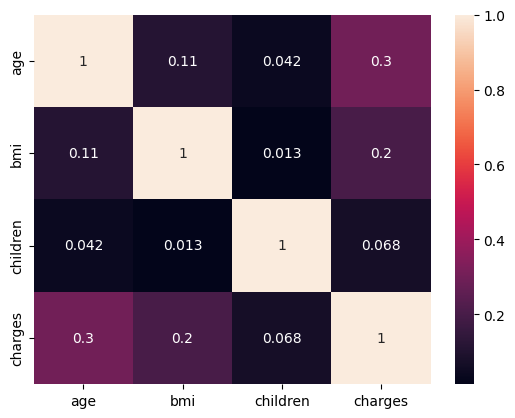

In [ ]:
correlacao = dados.corr(numeric_only=True)
sns.heatmap(correlacao,annot=True)
plt.show()

Como a variável **age** foi a que apresentou a maior correlação, pode-se gerar um diagrama de dispersão para compreender melhor esta relação.

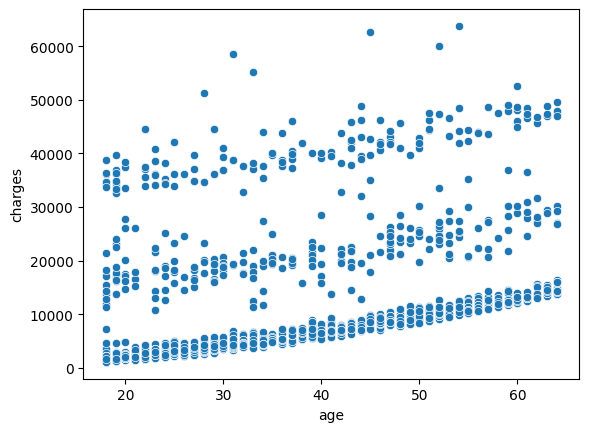

In [ ]:
sns.scatterplot(x="age", y="charges", data=dados)
plt.show()

Analisando o diagrama de dispersão acima, é possível perceber que o atributo idade influencia no valor a ser pago, mas existem "três grupos" que devem ser influenciadas por outras variáveis. Abaixo são gerados alguns outros diagramas de dispersão relacionando idade e valor pago, porém com cores para diferenciar as categorias de outras variáveis que podem estar influenciando no resultado.

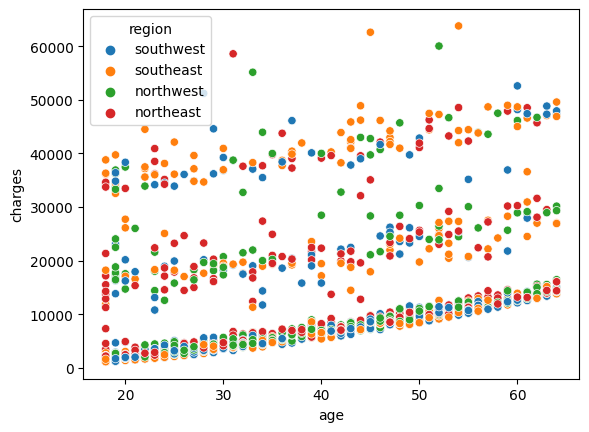

In [ ]:
sns.scatterplot(x="age", y="charges", hue="region", data=dados)
plt.show()

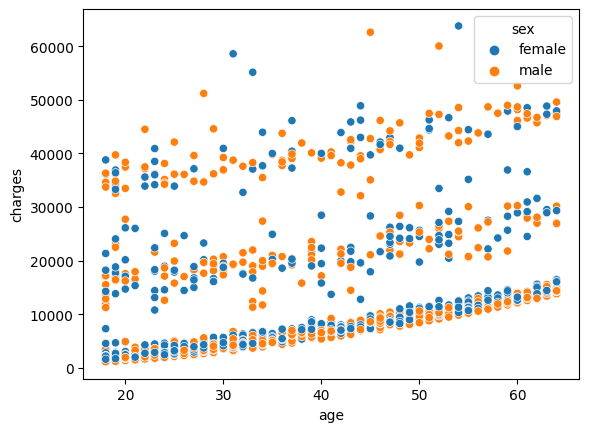

In [ ]:
sns.scatterplot(x="age", y="charges", hue="sex", data=dados)
plt.show()

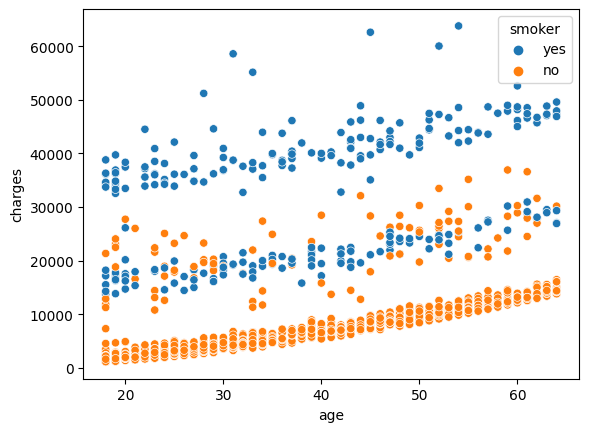

In [ ]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=dados)
plt.show()

Analisando os gráficos percebe-se que a variável smoker (se é fumante ou não) é que mais diferencia os elementos, por isto vamos incluí-la ao modelo, junto com a idade.

In [ ]:
dados2 = dados.copy()

le = LabelEncoder()
dados2['smoker']=le.fit_transform(dados2['smoker'])
X = dados2.drop(['sex','bmi','children','region','charges'] ,axis="columns")
y = dados2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print('X - Treinamento: ')
print(X_train)
print('Y - Treinamento: ')
print(y_train)
print('X - Teste: ')
print(X_test)
print('Y -Teste: ')
print(y_test)

X - Treinamento: 
      age  smoker
1046   43       0
682    39       1
1037   45       1
490    19       0
39     60       1
...   ...     ...
1095   18       0
1130   39       0
1294   58       0
860    37       1
1126   55       0

[896 rows x 2 columns]
Y - Treinamento: 
1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 896, dtype: float64
X - Teste: 
      age  smoker
764    45       0
887    36       0
890    64       1
1293   46       0
259    19       1
...   ...     ...
644    43       0
602    56       0
731    53       0
321    26       0
479    23       0

[442 rows x 2 columns]
Y -Teste: 
764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
644     18806.14547
602     11070.53500
731     10065.41300
321     24671.6633

In [ ]:
dados2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [  279.67194464 23699.57987506]
b =  -2565.745408803772
Coeficiente de determinação:  0.7302424130557652
Erro quadrado médio:  39531532.758319624


Considerando que o atributo **bmi** possui uma pequena correlação com **charges**, e a influência detectada anteriormente do atributo **smoker** pode-se elaborar um diagrama de dispersão relacionando estes três atributos para analisar a sua relação.

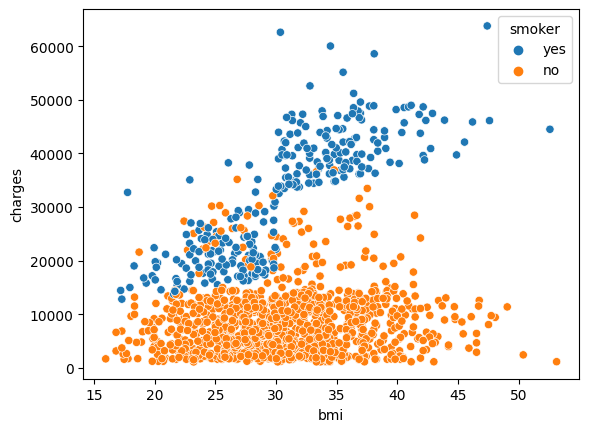

In [ ]:
sns.scatterplot(x="bmi", y="charges",hue="smoker", data=dados)
plt.show()

In [ ]:
dados2 = dados.copy()

le = LabelEncoder()
dados2['smoker']=le.fit_transform(dados2['smoker'])
X = dados2.drop(['sex','children','region','charges'] ,axis="columns")
y = dados2['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print('X - Treinamento: ')
print(X_train)
print('Y - Treinamento: ')
print(y_train)
print('X - Teste: ')
print(X_test)
print('Y -Teste: ')
print(y_test)

X - Treinamento: 
      age     bmi  smoker
1046   43  25.080       0
682    39  35.300       1
1037   45  30.495       1
490    19  32.900       0
39     60  39.900       1
...   ...     ...     ...
1095   18  31.350       0
1130   39  23.870       0
1294   58  25.175       0
860    37  47.600       1
1126   55  29.900       0

[896 rows x 3 columns]
Y - Treinamento: 
1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 896, dtype: float64
X - Teste: 
      age     bmi  smoker
764    45  25.175       0
887    36  30.020       0
890    64  26.885       1
1293   46  25.745       0
259    19  31.920       1
...   ...     ...     ...
644    43  35.310       0
602    56  25.300       0
731    53  21.400       0
321    26  29.640       0
479    23  32.560       0

[442 rows x 3 columns]
Y -Teste: 
764   

In [ ]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
a = modelo.coef_
b =  modelo.intercept_
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficientes da reta: \n")
print("a = ",a)
print("b = ",b)
print("Coeficiente de determinação: ", r2)
print("Erro quadrado médio: ",mse)

Coeficientes da reta: 

a =  [  264.6032201    331.13535319 23740.10771122]
b =  -12096.77735796464
Coeficiente de determinação:  0.755540757797331
Erro quadrado médio:  35824195.53303071
